In [1]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
series = read_csv('TSLA.csv')
X = series[["Close"]].values
size = int(len(X) * 0.85)

In [3]:

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=-1)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
mape = np.mean(np.abs(predictions -test )/np.abs(test))
print('MAPE: '+str(mape))

MAPE: 0.04325064358946879


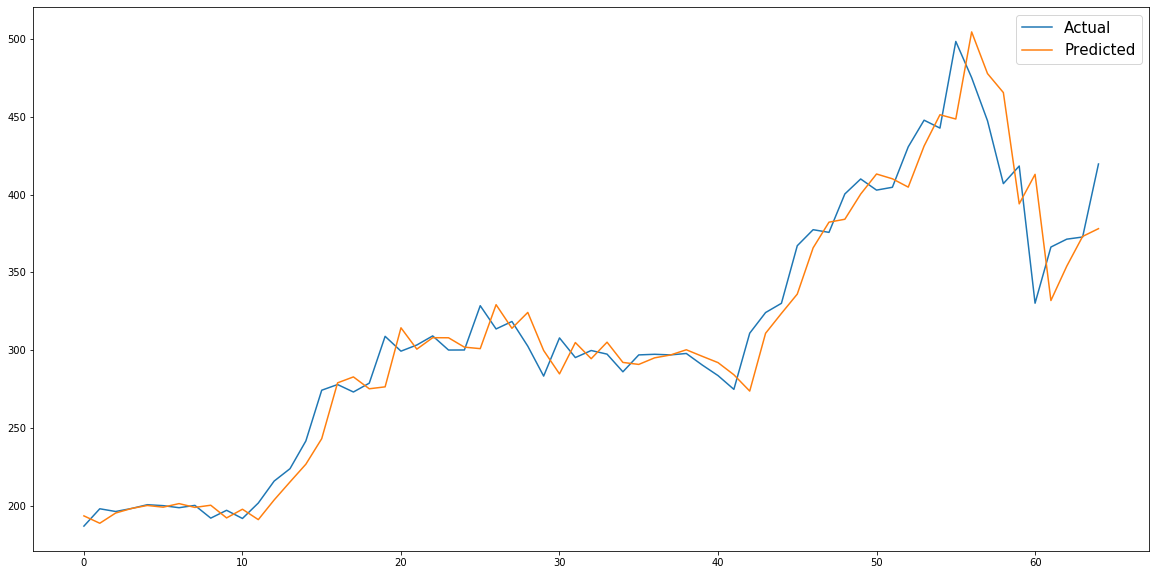

In [6]:
plt.figure(figsize=(20,10))
plt.plot(test,label="Actual")
plt.plot(predictions,label="Predicted")
plt.legend(fontsize=15)
plt.show()

The predictions are one time step ahead of the actual values. We need to shift the actual values by 1 time step (and put the dates on the x-axis).

In [7]:
from scipy.ndimage.interpolation import shift
test=shift(test.flatten()[1:], 1, cval=np.nan)
test

array([       nan, 198.179993, 196.425995, 198.358002, 200.792007,
       200.179993, 198.863998, 200.356003, 192.169998, 197.195999,
       191.947998, 201.869995, 215.962006, 223.925995, 241.731995,
       274.31601 , 277.971985, 273.175995, 278.855988, 308.929993,
       299.411987, 303.359985, 309.201996, 300.127991, 300.167999,
       328.600006, 313.671997, 318.466003, 302.614014, 283.399994,
       307.920013, 295.298004, 299.821991, 297.497986, 286.152008,
       297.      , 297.399994, 297.003998, 297.915985, 290.541992,
       283.713989, 274.877991, 310.951996, 324.200012, 330.141998,
       367.127991, 377.417999, 375.705994, 400.365997, 409.996002,
       402.839996, 404.667999, 430.634003, 447.75    , 442.679993,
       498.320007, 475.049988, 447.369995, 407.      , 418.320007,
       330.209991, 366.279999, 371.339996, 372.720001])

In [8]:
predictions=np.array(predictions[1:]).reshape(1,-1)
predictions

array([[188.87710569, 195.43909156, 198.36981804, 200.29289613,
        199.20715615, 201.50010068, 199.05432015, 200.45594981,
        192.30731428, 197.88413937, 191.20588711, 203.84974229,
        215.40983221, 226.79935525, 243.1984457 , 279.05166567,
        282.87344301, 275.24767722, 276.4852419 , 314.4075555 ,
        300.70122851, 308.05188343, 308.00432743, 301.98538112,
        301.02397168, 329.25064729, 314.08224076, 324.28534747,
        299.85614204, 284.80869044, 304.9397676 , 294.55976384,
        305.17199783, 292.16857626, 290.89240617, 295.11421212,
        296.94238745, 300.29860864, 296.12471371, 292.05556127,
        284.25772973, 273.76313851, 310.89219068, 323.6620138 ,
        336.06596375, 365.76098826, 382.25731778, 384.12266768,
        400.30909469, 413.18663732, 410.11517623, 404.76477131,
        431.15355965, 451.24561154, 448.50804642, 504.45137889,
        477.68536176, 465.49026404, 394.00687717, 412.97745667,
        331.92561328, 354.00009227, 373.

In [9]:
date=series[["Date"]]
train_date, test_date = date[0:size], date[size:len(X)]
test_date

,Date
364,6/12/2020
365,6/15/2020
366,6/16/2020
367,6/17/2020
368,6/18/2020
...,...
424,9/8/2020
425,9/9/2020
426,9/10/2020
427,9/11/2020


In [10]:
index=pd.DataFrame(np.arange(364,429)).rename(columns={0:"index"})
test=pd.DataFrame(test).rename(columns={0:"Close"})
test=pd.concat([index,test],axis=1)
test

,index,Close
0,364,NaN
1,365,198.179993
2,366,196.425995
3,367,198.358002
4,368,200.792007
...,...,...
60,424,330.209991
61,425,366.279999
62,426,371.339996
63,427,372.720001


In [11]:
test=test.set_index("index")
test=pd.concat([test_date,test],axis=1)
test

,Date,Close
364,6/12/2020,NaN
365,6/15/2020,198.179993
366,6/16/2020,196.425995
367,6/17/2020,198.358002
368,6/18/2020,200.792007
...,...,...
424,9/8/2020,330.209991
425,9/9/2020,366.279999
426,9/10/2020,371.339996
427,9/11/2020,372.720001


In [12]:
predictions=pd.DataFrame(predictions)
predictions

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,188.877106,195.439092,198.369818,200.292896,199.207156,201.500101,199.05432,200.45595,192.307314,197.884139,...,448.508046,504.451379,477.685362,465.490264,394.006877,412.977457,331.925613,354.000092,373.103804,378.085457


In [13]:
predictions=predictions.T
predictions

,0
0,188.877106
1,195.439092
2,198.369818
3,200.292896
4,199.207156
...,...
59,412.977457
60,331.925613
61,354.000092
62,373.103804


In [14]:
predictions=predictions.rename(columns={0:"Predicted close"})
predictions

,Predicted close
0,188.877106
1,195.439092
2,198.369818
3,200.292896
4,199.207156
...,...
59,412.977457
60,331.925613
61,354.000092
62,373.103804


In [15]:
predictions=pd.concat([index,predictions],axis=1)
predictions=predictions.set_index("index")
predictions=pd.concat([test_date,predictions],axis=1)
predictions

,Date,Predicted close
364,6/12/2020,188.877106
365,6/15/2020,195.439092
366,6/16/2020,198.369818
367,6/17/2020,200.292896
368,6/18/2020,199.207156
...,...,...
424,9/8/2020,331.925613
425,9/9/2020,354.000092
426,9/10/2020,373.103804
427,9/11/2020,378.085457


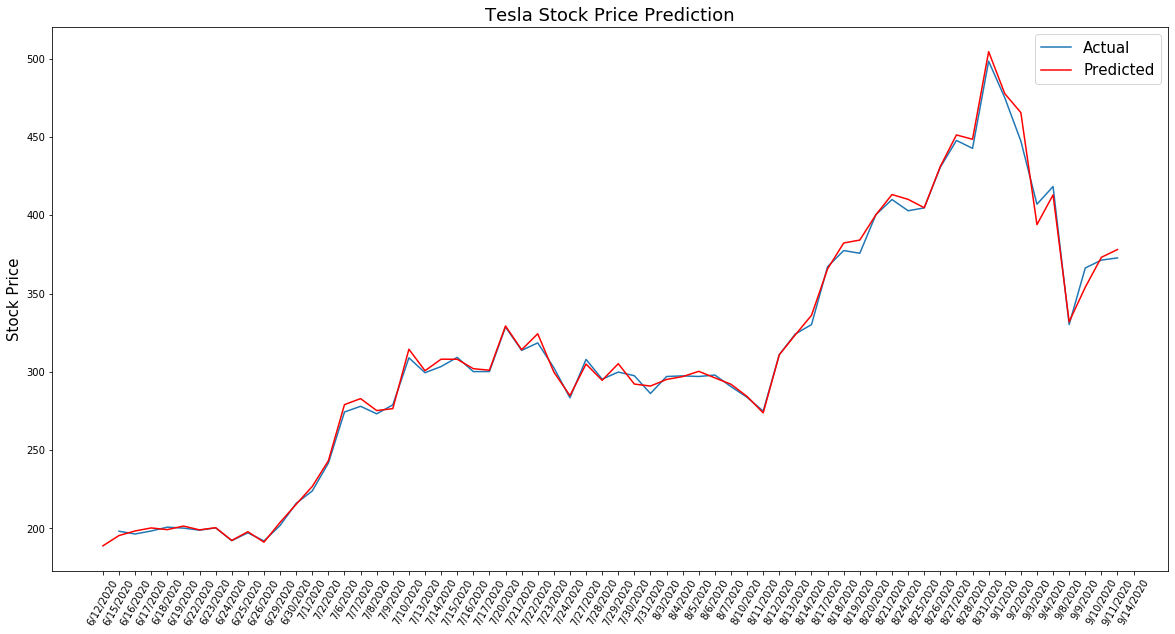

In [16]:
plt.figure(figsize=(20,10))
plt.plot(test["Date"],test["Close"],label="Actual")
plt.plot(predictions["Date"],predictions["Predicted close"], color='red',label="Predicted")
plt.title('Tesla Stock Price Prediction',fontsize=18)
plt.ylabel('Stock Price',fontsize=15)
plt.legend(fontsize=15)
plt.xticks(rotation=60)
plt.show()

As shown, the model indeed did very well on predicting Tesla's closing price.

In [19]:
len(test)

65

In [24]:
fc, se, conf=model_fit.forecast(len(test)+2,alpha=0.01)

In [38]:
import datetime

def workdays(d, end, excluded=(6, 7)):
    days = []
    while d.date() <= end.date():
        if d.isoweekday() not in excluded:
            days.append(d)
        d += datetime.timedelta(days=1)
    return days

workdays=workdays(datetime.datetime(2020, 6, 16),
               datetime.datetime(2020, 9,16 ))
workdays=pd.DataFrame(workdays).rename(columns={0:"Date"})

In [39]:
se=pd.DataFrame(conf).rename(columns={0:"lower bound",1:"upper bound"})
fc=pd.DataFrame(fc).rename(columns={0:"Predicted close"})
pd.concat([workdays,fc,se],axis=1)

,Date,Predicted close,lower bound,upper bound
0,2020-06-16,378.085457,356.199418,399.971495
1,2020-06-17,406.343802,376.929565,435.758040
2,2020-06-18,394.395546,356.713745,432.077347
3,2020-06-19,400.653129,354.295866,447.010393
4,2020-06-22,403.830743,350.290642,457.370845
...,...,...,...,...
62,2020-09-10,440.825058,273.422664,608.227452
63,2020-09-11,441.598548,272.905678,610.291417
64,2020-09-14,442.372060,272.398512,612.345608
65,2020-09-15,443.145545,271.900898,614.390193


As shown, with a 99% confidence level, for 9/15/2020,Tesla can close anywhere between 271 and 614 and the model predicts that it will close at around 443.  **As I am writing this code now,**, the stock is trading at 444.71 per share. The model has an accuracy of 95.7%.